In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


X,y = make_regression(n_samples=100, n_features=500, n_informative=15, n_targets=1,noise=20,random_state=42)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [37]:
lr = LinearRegression()
lr.fit(X_train,y_train)
preds = lr.predict(X_test)
r2_score(y_test, preds)

-0.05339825601389081

In [38]:
from sklearn.linear_model import Ridge


ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)
preds = ridge.predict(X_test)
print(r2_score(y_test, preds))

-0.05200728349543082


In [39]:
from sklearn.linear_model import Lasso


lasso = Lasso(alpha=1)
lasso.fit(X_train, y_train)
preds = lasso.predict(X_test)
print(r2_score(y_test, preds))


0.9495074708500991


In [40]:
print(np.sum(ridge.coef_ != 0))
print(np.sum(lasso.coef_ != 0))  

500
62


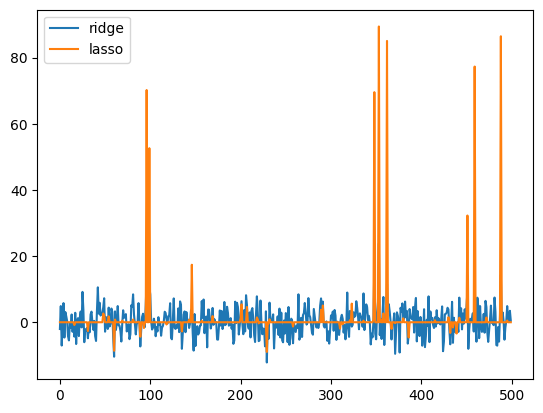

In [7]:
plt.plot(ridge.coef_, label='ridge')
plt.plot(lasso.coef_, label='lasso')
plt.legend()
plt.show()

In [61]:
# Make dense & correlated data
X, y = make_regression(
    n_samples=1000,
    n_features=5000,
    n_informative=5000,     # All features useful (dense)
    noise=5,
    effective_rank=10,    # Introduces correlation
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for alpha in [0.02, 0.01, 0.1, 1, 10, 100]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    print("Ridge R²:", r2_score(y_test, ridge.predict(X_test)), "alpha:", alpha)

    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    print("Lasso R²:", r2_score(y_test, lasso.predict(X_test)), "alpha:", alpha)
    print("---")


Ridge R²: 0.607010769035799 alpha: 0.02
Lasso R²: -0.004189986805926971 alpha: 0.02
---
Ridge R²: 0.6062037473372055 alpha: 0.01
Lasso R²: -0.004189986805926971 alpha: 0.01
---
Ridge R²: 0.5298980820272294 alpha: 0.1
Lasso R²: -0.004189986805926971 alpha: 0.1
---
Ridge R²: 0.25578686730523703 alpha: 1
Lasso R²: -0.004189986805926971 alpha: 1
---
Ridge R²: 0.04140356818656732 alpha: 10
Lasso R²: -0.004189986805926971 alpha: 10
---
Ridge R²: 0.0007473058172490221 alpha: 100
Lasso R²: -0.004189986805926971 alpha: 100
---
